In [1]:
cd ./data/real

E:\TPP-XCC\data\raw_data\NeuralPointProcess\data\real


In [2]:
# dataset = {
#     "sequences": [
#         {"arrival_times": [0.2, 4.5, 9.1], "marks": [1, 0, 4], "t_start": 0.0, "t_end": 10.0},
#         {"arrival_times": [2.3, 3.3, 5.5, 8.15], "marks": [4, 3, 2, 2], "t_start": 0.0, "t_end": 10.0},
#     ],
#     "num_marks": 5,
# }

In [3]:
import os

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
def process_rmtpp_github_data(name, file_prefix='', plot=True):
    marks = set()
    min_time, max_time = +1*np.inf, -1*np.inf
    min_times, max_times, diff_times, seq_len = [], [], [], []
    dataset = {}
    dataset['sequences'] = []

    with open(os.path.join(name,file_prefix+'event.txt')) as f_e:
        with open(os.path.join(name,file_prefix+'time.txt')) as f_t:
            for count, (e_l, t_l) in enumerate(zip(f_e.readlines(), f_t.readlines()), start=1):
                e_l, t_l = list(map(int,e_l.strip().split())), list(map(float,t_l.strip().split()))
                if not e_l and not t_l:
                    continue
                if not e_l or not t_l:
                    raise Exception('One of Mark of Time data is empty')
                seq_info = {'arrival_times':t_l, 'marks':e_l}
                dataset['sequences'].append(seq_info)
                marks.update(set(e_l))
                min_time_seq, max_time_seq = min(seq_info['arrival_times']), max(seq_info['arrival_times'])
                min_time, max_time = min(min_time, min_time_seq), max(max_time, max_time_seq)
                min_times.append(min_time_seq); max_times.append(max_time_seq); diff_times.append(max_time_seq-min_time_seq)
                seq_len.append(len(e_l))
            # Marks should begin from 0 upto to num_marks-1
            marks_map = {e:ix for ix,e in enumerate(sorted(marks))}
            new_sequences, sequences = [], dataset['sequences']
            for seq in sequences:
                seq['marks'] = [marks_map[x] for x in seq['marks']]
                seq['t_start'], seq['t_end'] = 0.0, int(np.ceil(max_time))
                new_sequences.append( seq )
            dataset['sequences'], dataset['num_marks'] = new_sequences, len(marks_map)

    diff_times, seq_len = np.array(diff_times), np.array(seq_len)

    print(f'Number of Sequences are {len(new_sequences)}')
    print(f'Number of Marks are {len(marks_map)}')
    if plot:
        sns.histplot(diff_times, kde=True)
        plt.title('End-Start time distribution')
        plt.show()
    print(f'Start & End times are 0, {seq["t_end"]}')
    print(f'Average time diff {diff_times.mean():0.4}±{diff_times.std():0.4}')
    if plot:
        sns.histplot(seq_len, kde=True)
        plt.title('Seq length distribution')
        plt.show()
    print(f'Min & Max Sequence Length are {seq_len.min()}, {seq_len.max()}')
    print(f'Sequence Length {seq_len.mean():0.4}±{seq_len.std():0.4}')
    
    return dataset

Number of Sequences are 4136
Number of Marks are 1754


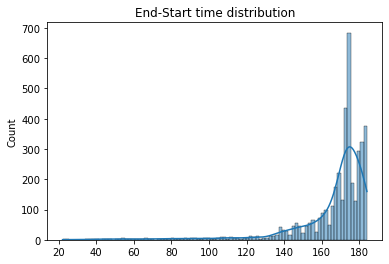

Start & End times are 0, 185
Average time diff 166.3±21.94


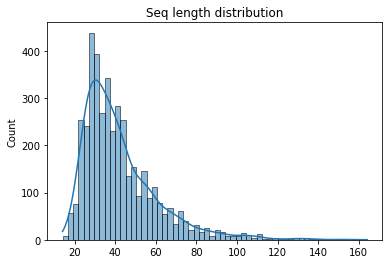

Min & Max Sequence Length are 14, 164
Sequence Length 42.21±18.56


In [5]:
_ = process_rmtpp_github_data(name='ali', file_prefix='')

Number of Sequences are 929
Number of Marks are 3150


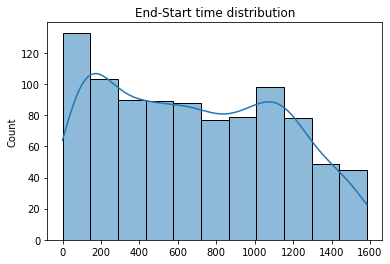

Start & End times are 0, 1584
Average time diff 683.7±444.3


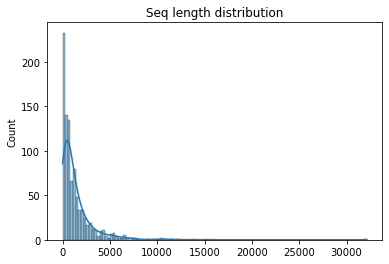

Min & Max Sequence Length are 3, 32149
Sequence Length 1.365e+03±2.018e+03


In [6]:
_ = process_rmtpp_github_data(name='lastfm', file_prefix='')

Number of Sequences are 650
Number of Marks are 75


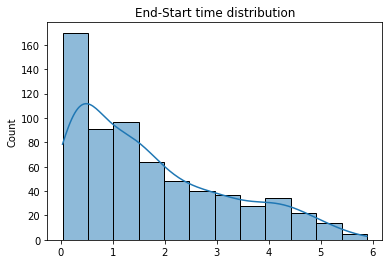

Start & End times are 0, 6
Average time diff 1.735±1.429


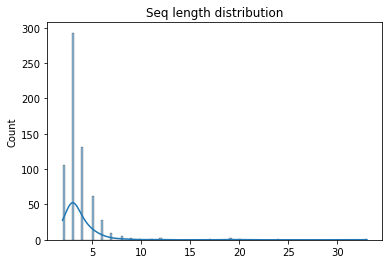

Min & Max Sequence Length are 2, 33
Sequence Length 3.722±2.297


In [7]:
_ = process_rmtpp_github_data(name='mimic2', file_prefix='')

Number of Sequences are 2994
Number of Marks are 2


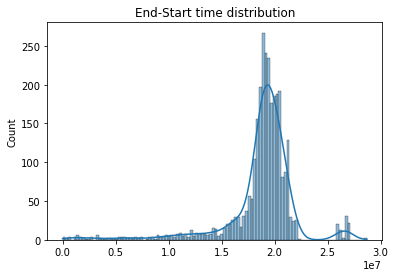

Start & End times are 0, 1253667031
Average time diff 1.873e+07±3.456e+06


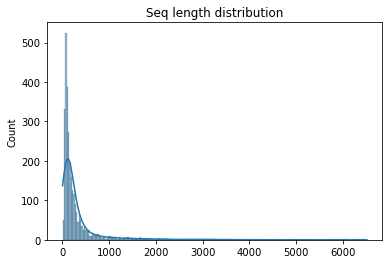

Min & Max Sequence Length are 2, 6517
Sequence Length 309.3±537.1


In [8]:
_ = process_rmtpp_github_data(name='sns', file_prefix='')

Number of Sequences are 6633
Number of Marks are 22


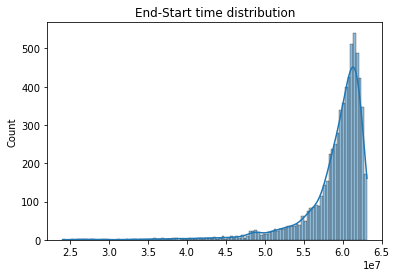

Start & End times are 0, 1388534142
Average time diff 5.902e+07±4.296e+06


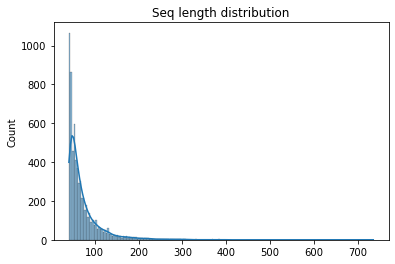

Min & Max Sequence Length are 41, 736
Sequence Length 72.43±43.68


In [9]:
_ = process_rmtpp_github_data(name='so', file_prefix='')

Number of Sequences are 1023
Number of Marks are 2


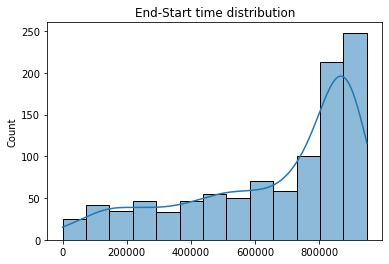

Start & End times are 0, 1431779693
Average time diff 6.57e+05±2.641e+05


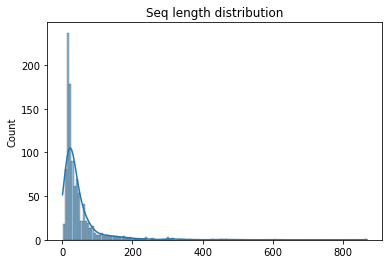

Min & Max Sequence Length are 1, 867
Sequence Length 45.79±60.88


In [10]:
_ = process_rmtpp_github_data(name='twitter', file_prefix='bolly-')

Number of Sequences are 942
Number of Marks are 2


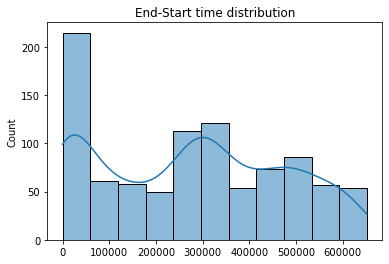

Start & End times are 0, 1430997912
Average time diff 2.761e+05±1.963e+05


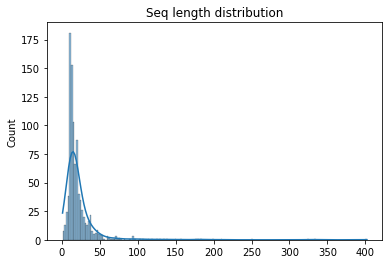

Min & Max Sequence Length are 1, 402
Sequence Length 22.85±29.16


In [11]:
_ = process_rmtpp_github_data(name='twitter', file_prefix='fight-')

Number of Sequences are 567
Number of Marks are 2


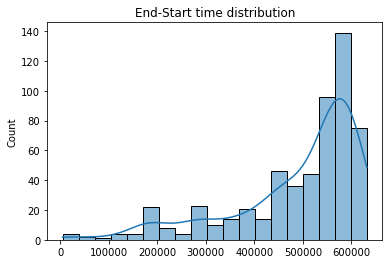

Start & End times are 0, 1430860538
Average time diff 4.896e+05±1.331e+05


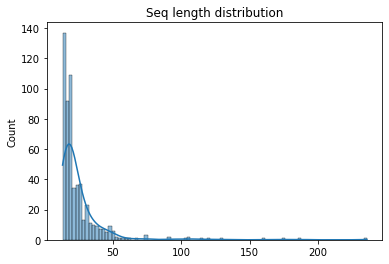

Min & Max Sequence Length are 13, 236
Sequence Length 24.72±20.06


In [12]:
_ = process_rmtpp_github_data(name='twitter', file_prefix='movie-')

Number of Sequences are 548
Number of Marks are 2


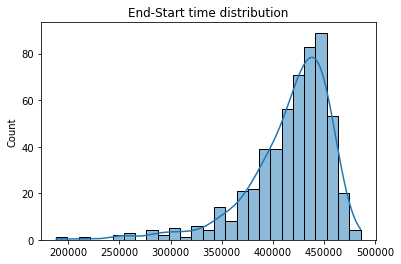

Start & End times are 0, 1387117512
Average time diff 4.167e+05±4.137e+04


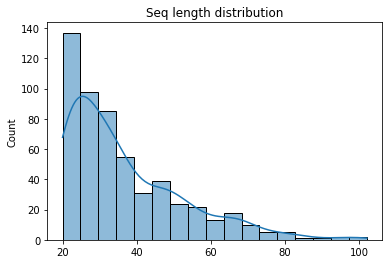

Min & Max Sequence Length are 20, 102
Sequence Length 36.54±15.65


In [13]:
_ = process_rmtpp_github_data(name='twitter', file_prefix='politics-')